# PREDIKSI CUSTOMER CHURN


## Problem Statment

Telecommunications companies face an increasing risk of customer churn due to increasingly fierce competition between providers. This can result in reduced company revenue.

Therefore an effective strategy is needed to reduce the churn rate and retain customers

## Solution

Predicting customer churn. This prediction is important for companies to know in order to be able to map a business strategy to retain customers.

## Goals

* Identify the factors that affect customer churn at telecommunications companies.
* Develop prediction models to estimate the probability of future customer churn.
* Identify potential churn customers and take action to retain them.




# Exploratory Data Analysis (EDA)

Upload Data Train and Data Test

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Data Train Provider.csv to Data Train Provider.csv


In [3]:
import io
import pandas as pd
df= pd.read_csv(io.BytesIO(uploaded['Data Train Provider.csv']))

In [4]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


* state: the state where the customer is located
* account_length: the number of days since the customer joined the service provider
* area_code: area code of the customer's phone
* international_plan: does the customer have an international service plan (yes/no)
* voice_mail_plan: does the customer have a voicemail service plan (yes/no)
* number_vmail_messages: the number of voicemail messages received by the subscriber
* total_day_minutes: number of minutes used by the customer during business hours (in minutes)
* total_day_calls: number of calls made by the customer during business hours
* total_day_charge: the fee charged to the customer for usage during business hours
* total_eve_minutes: the number of minutes the customer used during the night hours (in minutes)
* total_eve_calls: number of calls made by the customer during night hours
* total_eve_charge: the fee charged to the customer for use during night hours
* total_night_minutes: the number of minutes the customer spends sleeping hours (in minutes)
* total_night_calls: number of calls made by the customer during sleeping hours
* total_night_charge: the fee charged to the customer for usage during sleeping hours
* total_intl_minutes: number of minutes used by the customer for international calls (in minutes)
* total_intl_calls: number of calls made by the customer for international calls
* total_intl_charge: the fee charged to the customer for international calls
* number_customer_service_calls: the number of calls made by the customer to the customer service center
* churn: target variable indicating whether the customer switches services (yes/no)

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Data Test.csv to Data Test.csv


In [6]:
import io
import pandas as pd
df_test= pd.read_csv(io.BytesIO(uploaded['Data Test.csv']))

In [7]:
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


#### First we will take a look at the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

**No blank data**

**We divide the data into Categorical and Numerical data**

In [10]:
Numericals = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
              'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 
              'number_customer_service_calls']
Categoricals = ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [11]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [12]:
# View summary descriptive statistics of columns with data type object (including strings)
df.describe(include='O')

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


In [13]:
df['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

Here is some initial information about the data we have:
1. There are 4250 data in each column in the dataframe.
2. The fields "international_plan" and "voice_mail_plan" each have 2 unique values, namely "yes" and "no", indicating whether the customer has an international service plan
3. The "churn" column also has 2 unique values, namely "yes" and "no", which indicate whether the customer has stopped subscribing to the service or is still actively using the company's services.
4. The value "area_code_415" in the "area_code" column appears 2108 times, which is the value that appears most frequently in that column.
5. The values ​​"no" in the columns "international_plan", "voice_mail_plan", and "churn" each appear with a higher frequency than the values ​​"yes".

## Univariate Anlysis

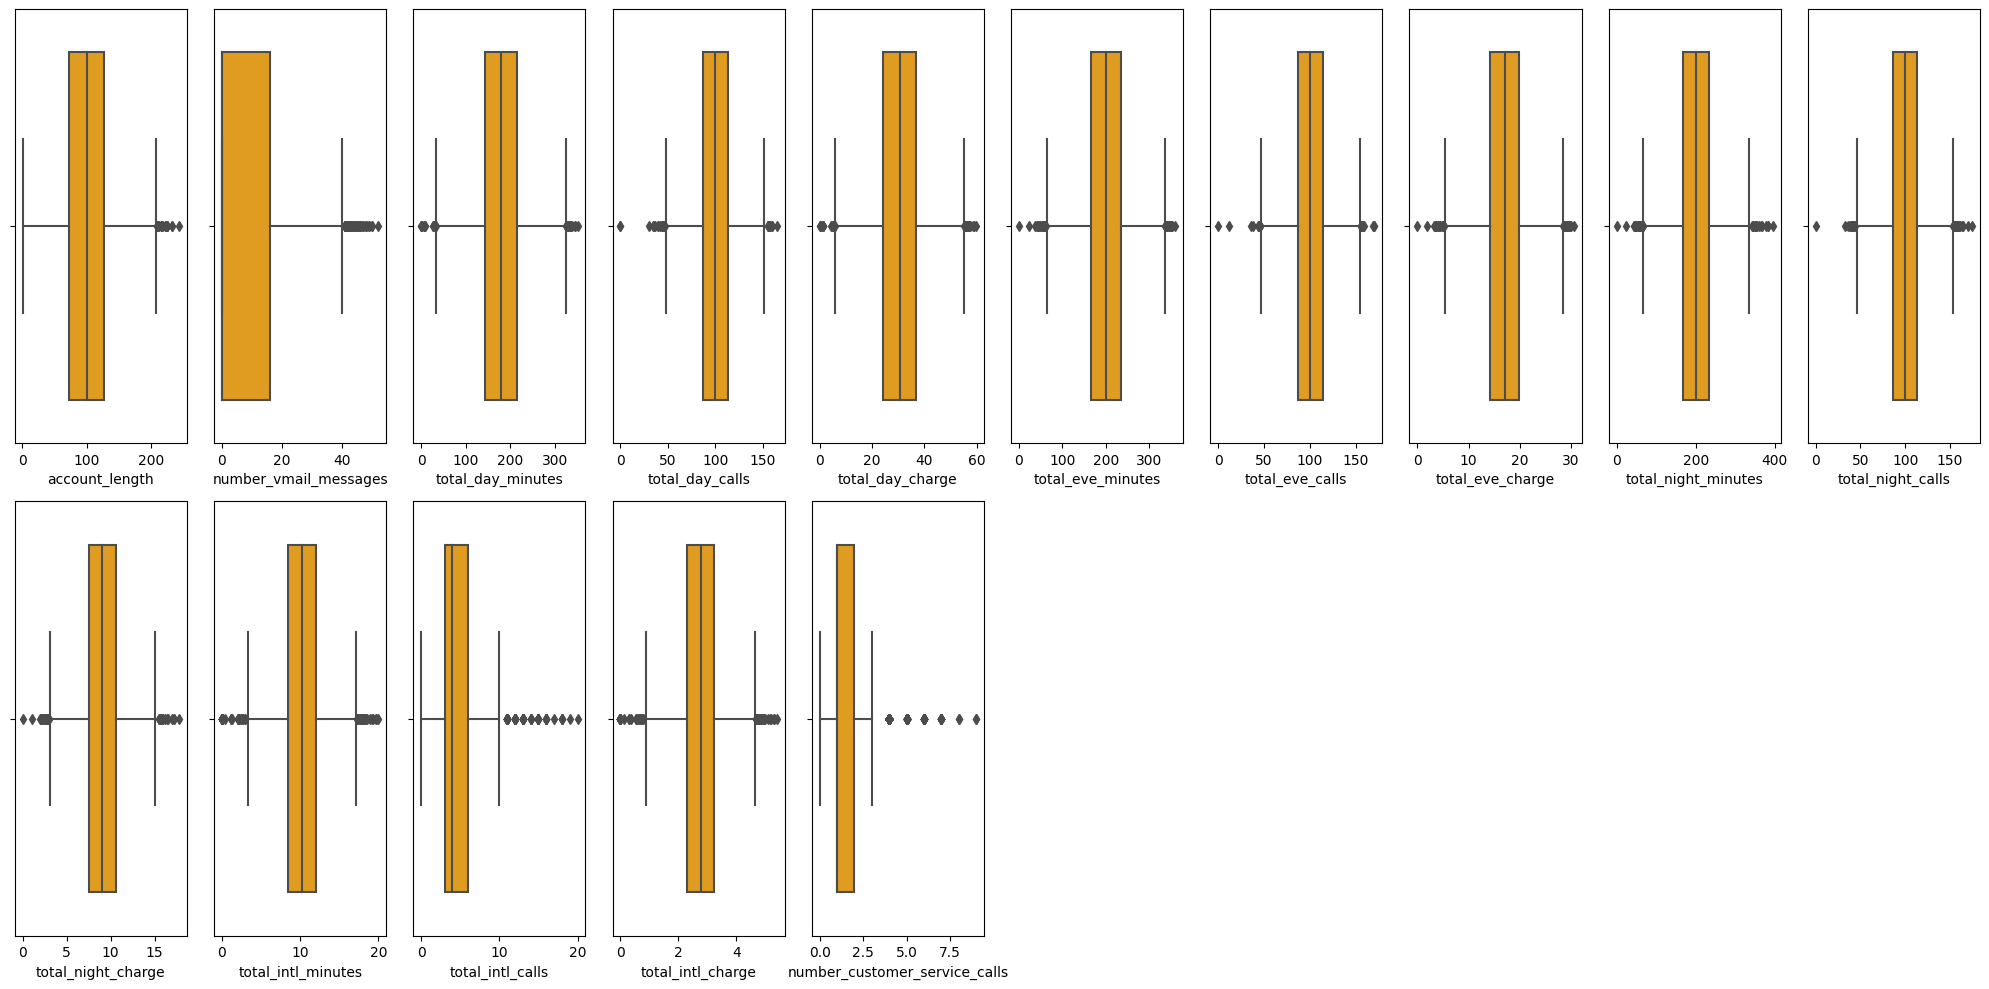

In [14]:

plt.figure(figsize=(20,10))

for i in range(0, len(Numericals)):
    plt.subplot(2, 10, i+1)
    sns.boxplot(x=df[Numericals[i]], color='orange', orient='h')
    plt.tight_layout()

plt.show()

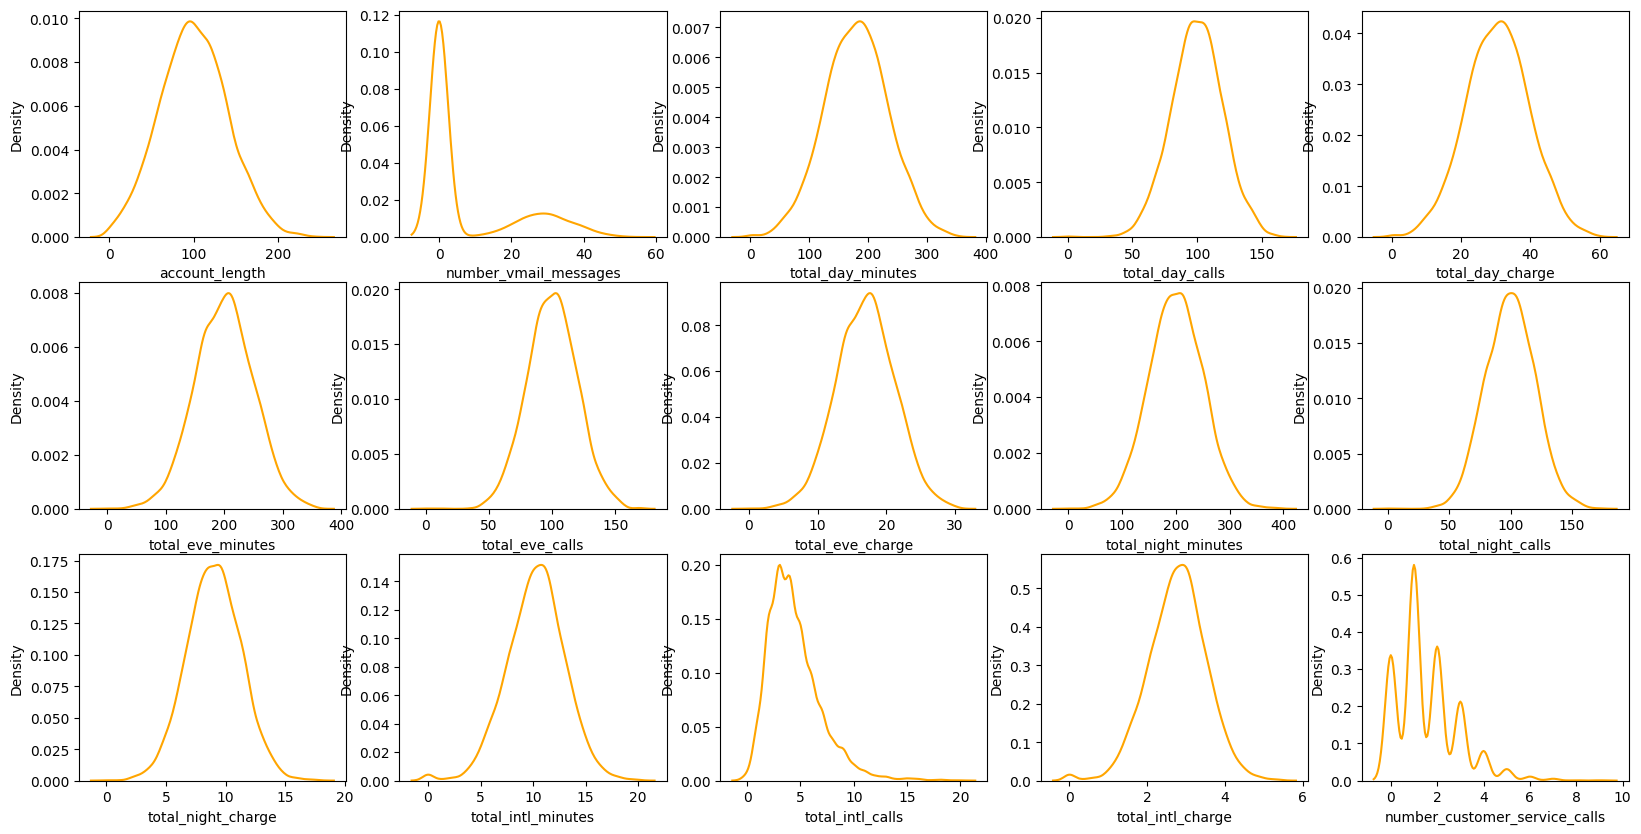

In [15]:
plt.figure(figsize=(20,10))
for i in range(len(Numericals)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[Numericals[i]], color='orange')

Among the Numerical Columns only Number_vmail_Messages, total_intl_class and number_customer_service call are Right or Positive Skew and the others are normally distributed

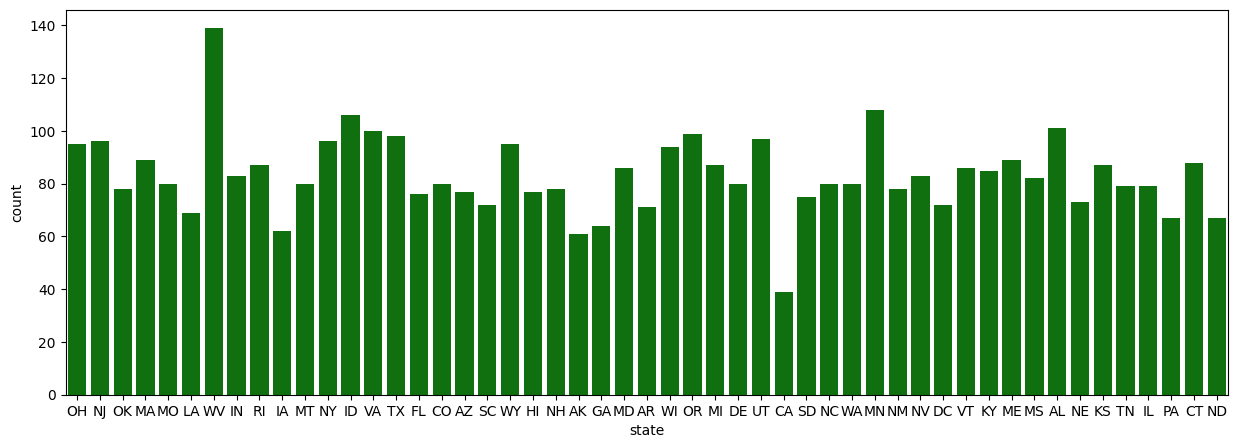

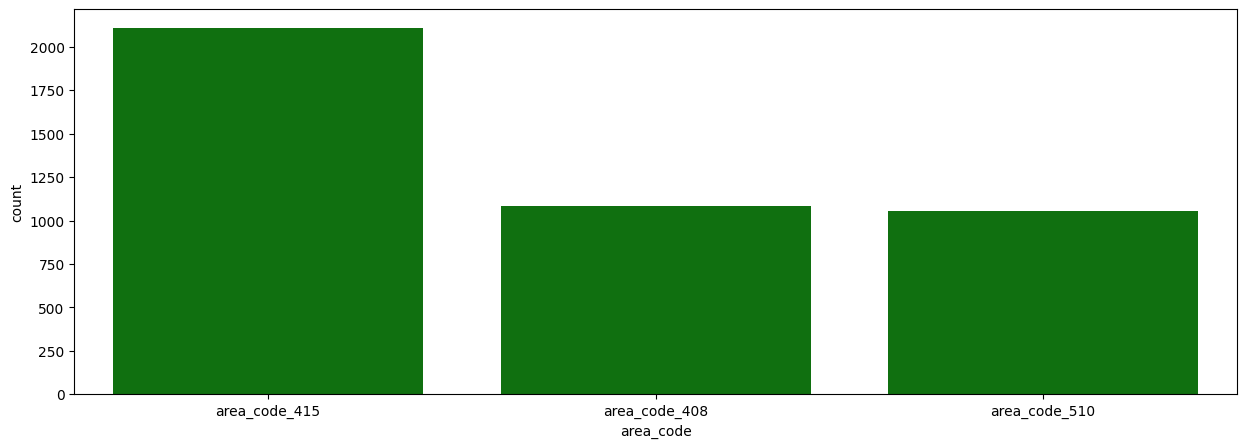

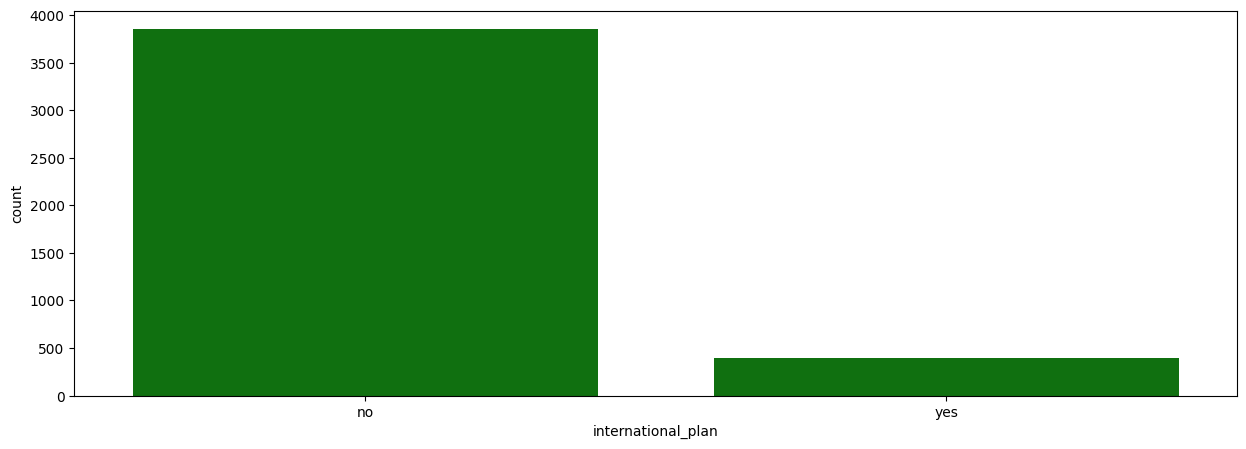

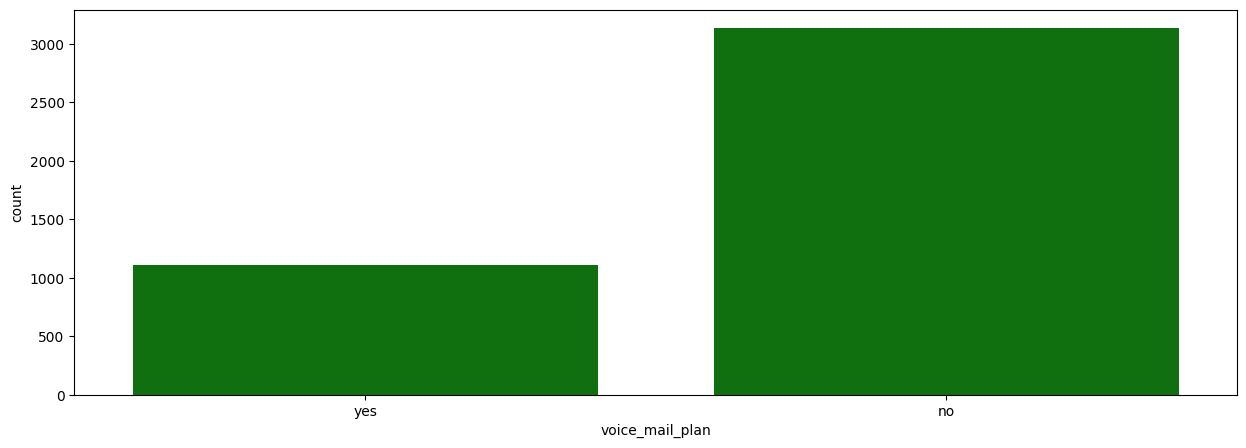

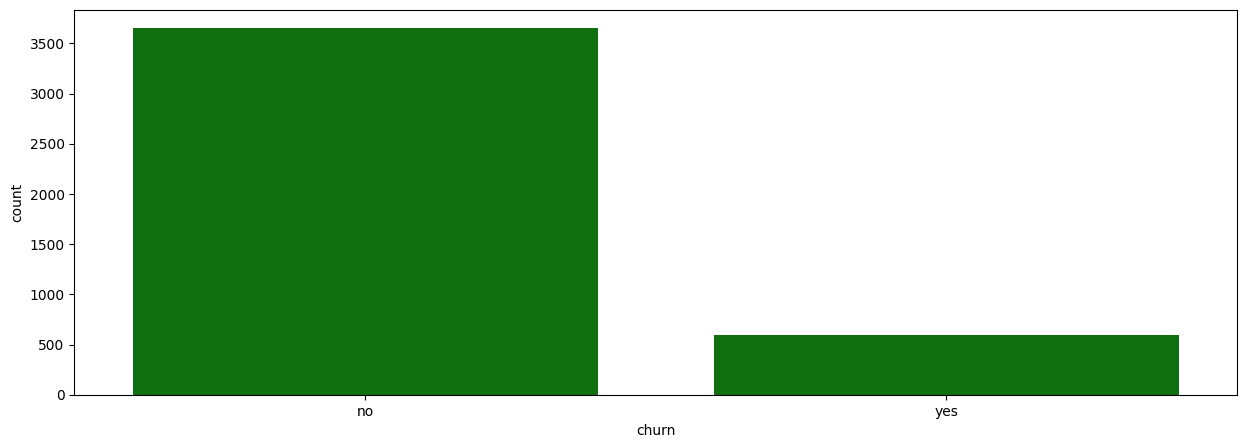

In [16]:
for i in range(len(Categoricals)):
    plt.figure(figsize=(15,5))
    sns.countplot(x=df[Categoricals[i]], data=df, color='green')

* The highest number of customers in the countries that have the WV country code
* Area code 415 is the area code of most customer telephones
* Customers have fewer international service plans than those who do not.
* It turns out that there are still many customers who do not have a voicemail service package
* From the existing Churn data, it turns out that there are more customers who do not churn. This indicates that the services provided allow customers to survive and not churn.

## Multivariate Analysis

<ipython-input-17-e7a9925f8813>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


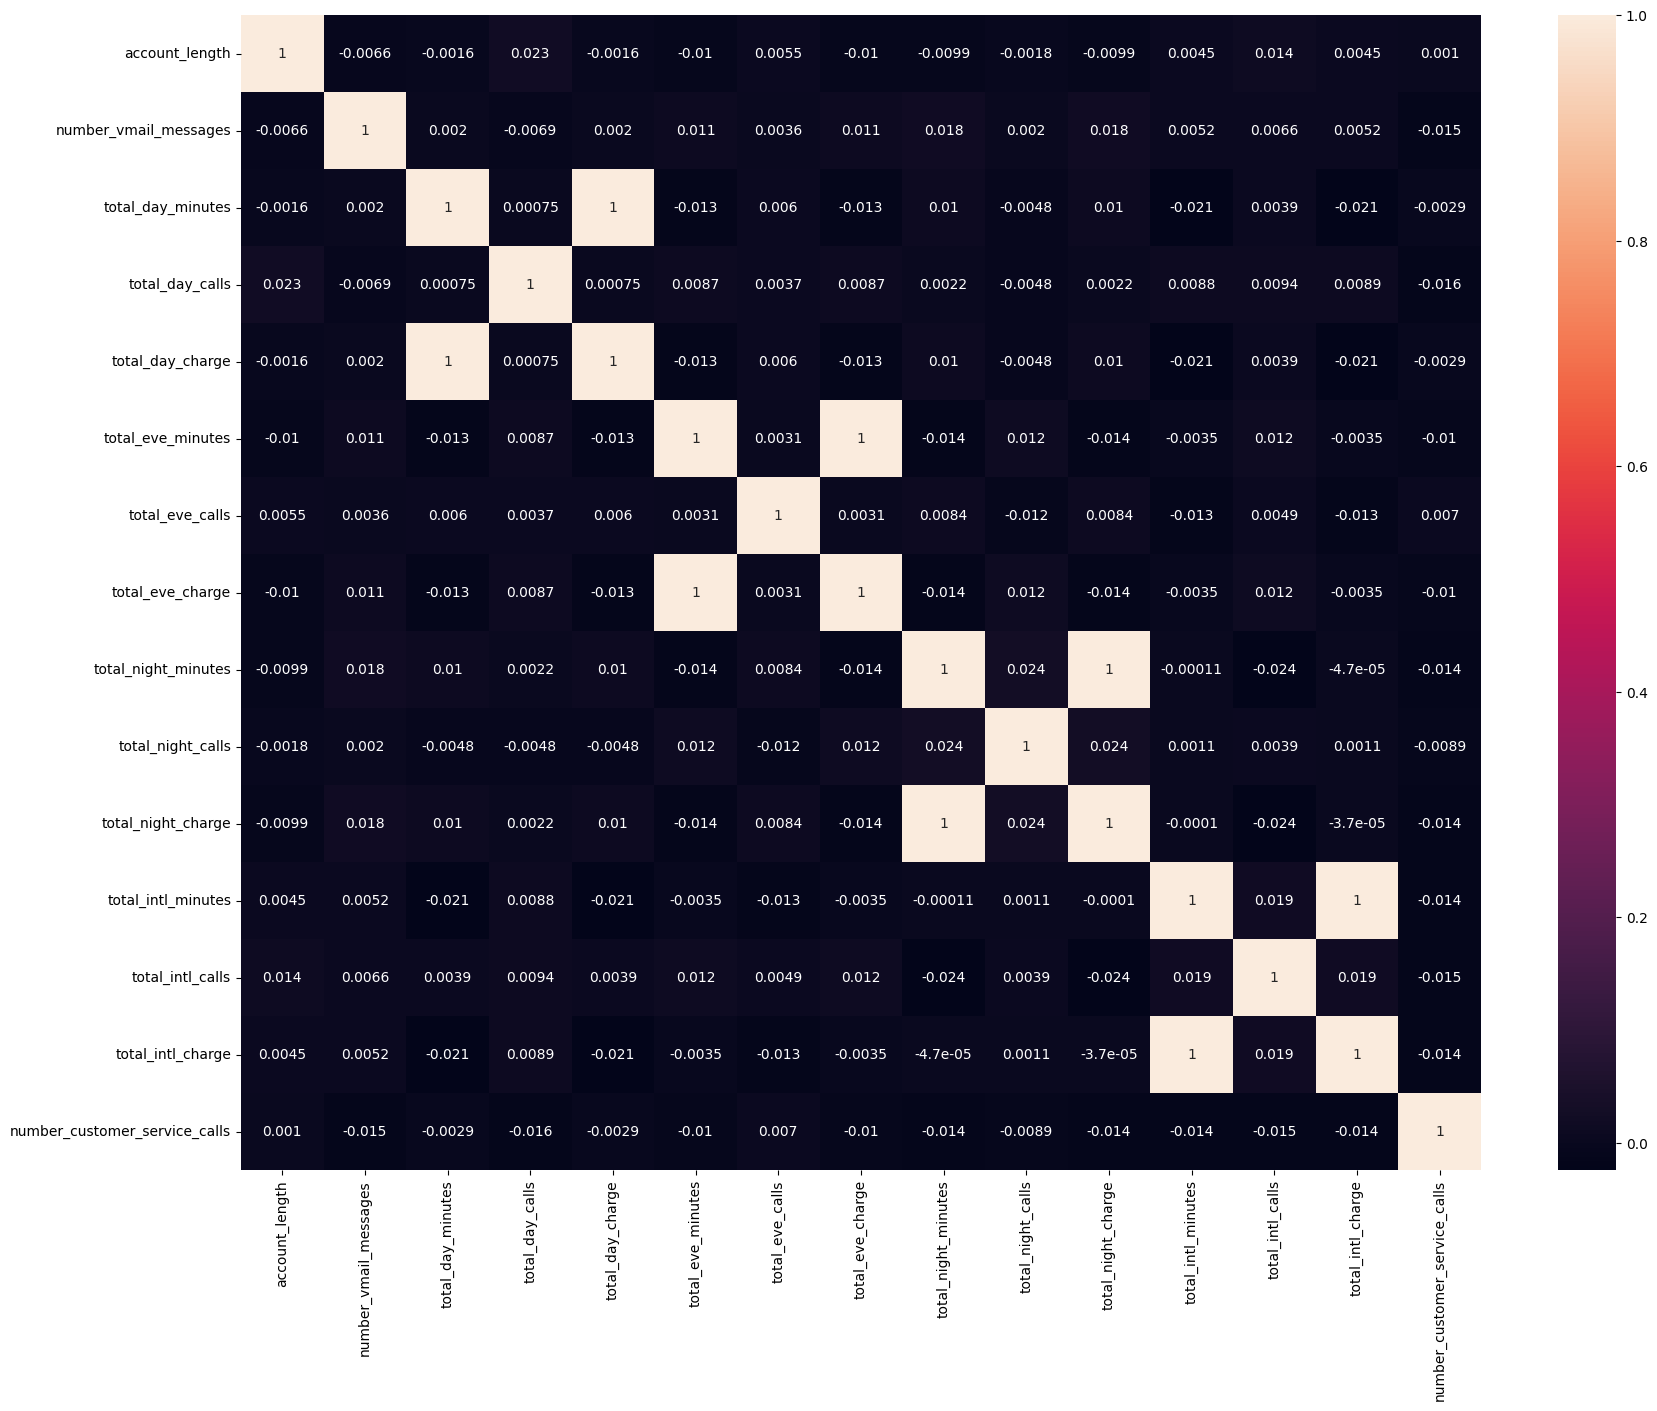

In [17]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In this case, the heatmap will show black on
entire heatmap box. However, if you pay more attention
Furthermore, the highest correlation value is found in the column
total day calls of 0.023 this means the number of calls that
carried out by customers during business hours
customers can churn or not.
The higher the value of the total day calls, the higher the churn rate that will occur.
otherwise for the smallest correlation value on Total night calls
equal to -0.0089 means the greater the total number
night it is likely that the customer will experience a slight churn


Text(0.5, 0, 'Total Night Calls')

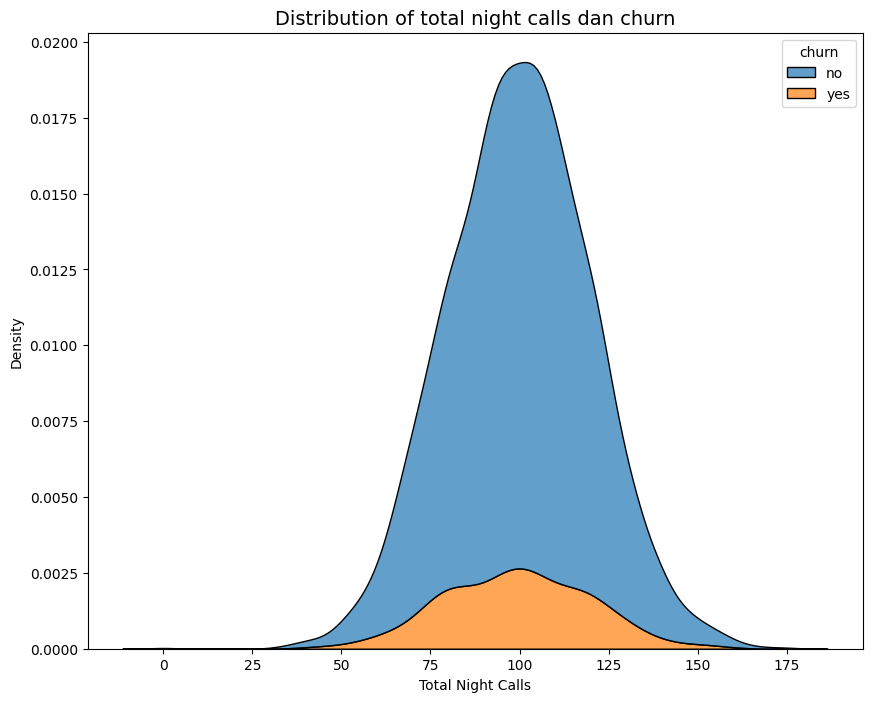

In [18]:
fig, ax = plt.subplots(1, 1, figsize = (10,8))

sns.kdeplot(data = df, x = df['total_night_calls'], alpha = 0.7, multiple = 'stack', hue = 'churn')
ax.set_title('Distribution of total night calls dan churn', fontsize = 14)
ax.set_xlabel('Total Night Calls')

From the distribution it appears that the distribution is normal, the greater the total nights calls, the level of subscribers who do not churn or unsubscribe is more than those who do churn.

If you look further, services such as customer service or complaints can be an indication of customer satisfaction whether you can churn or not

# DATA PREPROCESSING

Split Data

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
              'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 
              'number_customer_service_calls', 'state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'])
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## Missing Value

In [20]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

No Missing Value

## Duplicate Data

In [21]:
print(df.duplicated().sum())


0


No Duplicate data

## Handle Outliers

In [22]:
from scipy import stats

print(f'The number of rows before filtering out the outliers: {len(df)}')
filtered_entries = np.array([True] * len(df))
for col in ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
              'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 
              'number_customer_service_calls']:
    zscore=abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries


df = df[filtered_entries]
print(f'Number of rows after filtering outliers: {len(df)}')


The number of rows before filtering out the outliers: 4250
Number of rows after filtering outliers: 4031


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4031 entries, 0 to 4248
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4031 non-null   object 
 1   account_length                 4031 non-null   int64  
 2   area_code                      4031 non-null   object 
 3   international_plan             4031 non-null   object 
 4   voice_mail_plan                4031 non-null   object 
 5   number_vmail_messages          4031 non-null   int64  
 6   total_day_minutes              4031 non-null   float64
 7   total_day_calls                4031 non-null   int64  
 8   total_day_charge               4031 non-null   float64
 9   total_eve_minutes              4031 non-null   float64
 10  total_eve_calls                4031 non-null   int64  
 11  total_eve_charge               4031 non-null   float64
 12  total_night_minutes            4031 non-null   f

## Feature Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [25]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


# MODEL

## Logistic Regression

In [26]:
from sklearn.model_selection import train_test_split

X = df.drop(['churn'], axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
   

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" %precision_score(y_test, y_pred, zero_division=1))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
  
    

    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc(crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc(crossval test): '+ str(score['test_score'].mean()))
    

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
eval_classification(lr)

Accuracy (Test Set): 0.88
Precision (Test Set): 0.61
Recall (Test Set): 0.19
F1-Score (Test Set): 0.29
AUC (test-proba): 0.81
AUC (train-proba): 0.83
roc_auc(crossval train): 0.8268933917687811
roc_auc(crossval test): 0.8195327615167786


* Accuracy (Test Set): 0.88
Accuracy measures how well the model predicts the correct label overall. In this case, the model has an accuracy of 0.88, meaning that your model is able to correctly predict 88% of all data samples in the dataset used for testing.

* Precision (Test Set): 0.61
Precision measures how well the model predicts absolutely positive positive data from all data that the model predicts positively. In this case, the model has a precision value of 0.61, which means that around 61% of the data predicted to be positive by the model are actually positive.

* Recall (Test Set): 0.19
Recall measures how well the model predicts truly positive positive data from all the positive data in the dataset. In this case, the model has a recall value of 0.19, which means that the model only succeeds in predicting about 19% of the positive data in the dataset.

* F1-Score (Test Set): 0.29
The F1-score is the harmonized average of precision and recall, which measures how well the model as a whole predicts the data. In this case, the model has an F1-score of 0.29, which indicates the overall model performance in predicting labels in the dataset.

* AUC (test-proba): 0.81
AUC (Area Under Curve) measures how well the model differentiates between positive and negative class data. In this case, the model has an AUC of 0.81 on the test data using the model's prediction probability. The higher the AUC value, the better the model's performance in discriminating between positive and negative classes.

* AUC (train-proba): 0.83
AUC on the training data using the probability prediction model shows the performance of the model on the training data. In this case, the AUC value is 0.83, which indicates that the model has a good performance in discriminating between positive and negative classes in the training data.

* roc_auc(crossval train): 0.8268933917687811
roc_auc(crossval train) is the AUC on the training data when the cross validation was performed. In this case, the AUC value is 0.826, which indicates that the model has good performance in discriminating between positive and negative classes in the training data during cross-validation.

* roc_auc(crossval test): 0.8195327615167786
roc_auc(crossval test) is the AUC on the test data when cross validation was performed. In this case, the AUC value is 0.819, which indicates that the model has good performance in distinguishing between positive and negative classes.

#### Tuning Hyperparameter

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score


penalty = ['l2']
C =[float(x) for x in np.linspace(0.0001, 1, 100)]
hyperparameters = dict(penalty=penalty, C=C)

lr = LogisticRegression(max_iter=5000)
rs = RandomizedSearchCV(lr, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)


Accuracy (Test Set): 0.88
Precision (Test Set): 0.61
Recall (Test Set): 0.19
F1-Score (Test Set): 0.29
AUC (test-proba): 0.81
AUC (train-proba): 0.83
roc_auc(crossval train): 0.8268108004699612
roc_auc(crossval test): 0.819393841951193


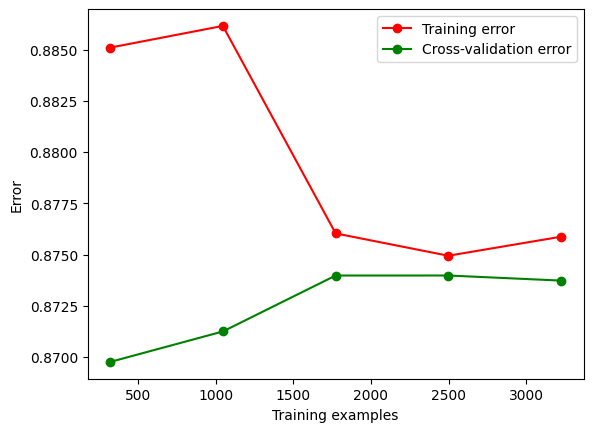

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Create a Logistic Regression model
model = LogisticRegression(max_iter=5000)

# Calculating learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# Make learning curve plots
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training error")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation error")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Error")
plt.show()


param value: 1; train: 0.8294673126866402; test: 0.8125634178905208
param value: 2; train: 0.8296044318218206; test: 0.8133377837116155
param value: 3; train: 0.8295814417871795; test: 0.8136582109479306
param value: 4; train: 0.8298959126181626; test: 0.8136315086782376
param value: 5; train: 0.8299862306113953; test: 0.8138584779706275
param value: 6; train: 0.8298663540021957; test: 0.8137116154873164
param value: 7; train: 0.8298113421335902; test: 0.8139519359145527
param value: 8; train: 0.8298261214415737; test: 0.8137650200267023
param value: 9; train: 0.829831868950234; test: 0.8137516688918558
param value: 10; train: 0.8297973838982724; test: 0.814392523364486
param value: 11; train: 0.8298170896422504; test: 0.8141789052069426
param value: 12; train: 0.8298072367702615; test: 0.8140987983978638
param value: 13; train: 0.8298409007495572; test: 0.8145260347129505
param value: 14; train: 0.8298770279468503; test: 0.8141255006675567
param value: 15; train: 0.8298959126181625; t

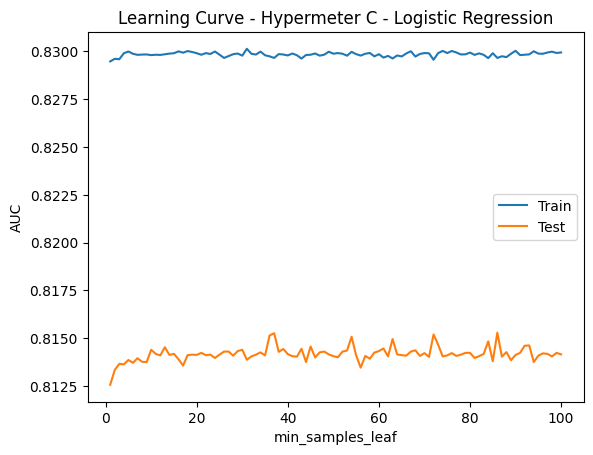

In [31]:
def draw_learning_curve(param_values):
    train_scores= []
    test_scores= []

    for i in param_values:
      lr = LogisticRegression(penalty='l2', C=i, max_iter=5000)
      lr.fit(X_train, y_train)

      # eval on train
      y_pred_train_proba = lr.predict_proba(X_train)
      train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
      train_scores.append(train_auc)

      #eval on test
      y_pred_proba = lr.predict_proba(X_test)
      test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
      test_scores.append(test_auc)

      print('param value: ' +str(i) + '; train: ' +str(train_auc) + '; test: ' + str(test_auc))


    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('min_samples_leaf')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hypermeter C - Logistic Regression')
    plt.legend()
    plt.show()


param_values= [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve(param_values)

## K-Nearst Neighboar (KNN)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
eval_classification(knn)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.77
Recall (Test Set): 0.40
F1-Score (Test Set): 0.53
AUC (test-proba): 0.70
AUC (train-proba): 0.91
roc_auc(crossval train): 0.9141312391229632
roc_auc(crossval test): 0.6753537341406997


#### Tuning Hyperparameter

In [33]:
from sklearn.utils.extmath import weighted_mode
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = [int(x) for x in np.linspace(1, 100, 50)] 
weights = ['uniform', 'distance']
p = [1, 2, 3]
hyperparameters = dict(n_neighbors=n_neighbors, weights=weights, p=p)

knn.fit(X_train, y_train)
rs = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)


Accuracy (Test Set): 0.90
Precision (Test Set): 0.89
Recall (Test Set): 0.30
F1-Score (Test Set): 0.45
AUC (test-proba): 0.76
AUC (train-proba): 1.00
roc_auc(crossval train): 0.9602674711407293
roc_auc(crossval test): 0.7393176100829366


In [34]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, roc_auc_score

# Dividing the data into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the undersampling technique to the train data
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# Applying oversampling technique to the data train
oversample = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

# Build models with undersample or oversample train data
knn = KNeighborsClassifier()
knn.fit(X_train_under, y_train_under)
# or
knn.fit(X_train_over, y_train_over)

# Evaluate the model on test data
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:,1] # get the probability of a positive prediction
print(classification_report(y_test, y_pred))
print("ROC AUC (test-proba):", roc_auc_score(y_test, y_pred_proba))

# Evaluate the model on the train data
y_train_pred = knn.predict(X_train_under)
y_train_pred_proba = knn.predict_proba(X_train_under)[:,1] # get the probability of a positive prediction
print("ROC AUC (train-proba):", roc_auc_score(y_train_under, y_train_pred_proba))


              precision    recall  f1-score   support

           0       0.91      0.73      0.81       700
           1       0.24      0.55      0.34       107

    accuracy                           0.71       807
   macro avg       0.58      0.64      0.57       807
weighted avg       0.83      0.71      0.75       807

ROC AUC (test-proba): 0.6736982643524699
ROC AUC (train-proba): 0.9867360671103687


param value: 1; train: 1.0; test: 0.6495060080106809
param value: 2; train: 0.9638202540563043; test: 0.6817423230974633
param value: 3; train: 0.9401327181856922; test: 0.7027036048064085
param value: 4; train: 0.9234924490052294; test: 0.7018224299065421
param value: 5; train: 0.9116176855767912; test: 0.6957877169559412
param value: 6; train: 0.9001349843462496; test: 0.7082710280373832
param value: 7; train: 0.8882971691877701; test: 0.7158611481975968
param value: 8; train: 0.8810483291581788; test: 0.7180841121495327
param value: 9; train: 0.8725744487112854; test: 0.7214485981308412
param value: 10; train: 0.8660009409492749; test: 0.7211014686248332
param value: 11; train: 0.8567946636845307; test: 0.7358744993324432
param value: 12; train: 0.8503315901960639; test: 0.7342256341789052
param value: 13; train: 0.8438147364479903; test: 0.7325233644859812
param value: 14; train: 0.8384555951586271; test: 0.7291655540720962
param value: 15; train: 0.833393682174266; test: 0.7298331

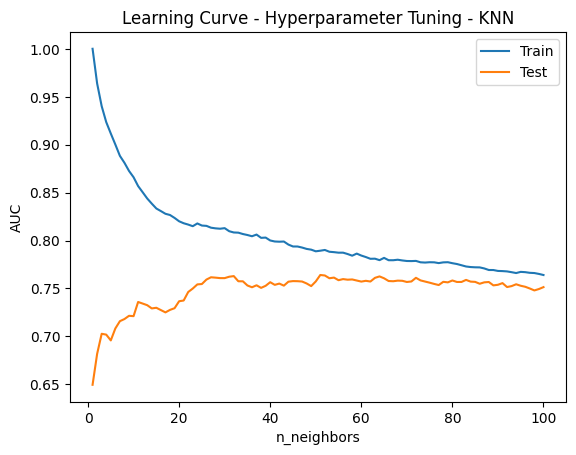

In [35]:
def draw_learning_curve(param_values):
    train_scores= []
    test_scores= []

    for i in param_values:
      knn = KNeighborsClassifier(n_neighbors=i)
      knn.fit(X_train, y_train)

      # eval on train
      y_pred_train_proba = knn.predict_proba(X_train)
      train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
      train_scores.append(train_auc)

      #eval on test
      y_pred_proba = knn.predict_proba(X_test)
      test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
      test_scores.append(test_auc)

      print('param value: ' +str(i) + '; train: ' +str(train_auc) + '; test: ' + str(test_auc))


    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('n_neighbors')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter Tuning - KNN')
    plt.legend()
    plt.show()


param_values= [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve(param_values)


## Decisision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
eval_classification(dtc)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.60
Recall (Test Set): 0.70
F1-Score (Test Set): 0.65
AUC (test-proba): 0.81
AUC (train-proba): 1.00
roc_auc(crossval train): 1.0
roc_auc(crossval test): 0.832517667790117


* Accuracy (Test Set): 0.90
Accuracy measures how well the model predicts the correct label overall. In this case, your model has an accuracy of 0.90, meaning that the model is able to correctly predict 90% of all data samples in the dataset used for testing.

* Precision (Test Set): 0.62
Precision measures how well the model predicts absolutely positive positive data from all data that the model predicts positively. In this case, the model has a precision value of 0.62, which means that around 62% of the data predicted to be positive by the model are actually positive.

* Recall (Test Set): 0.72
Recall measures how well the model predicts truly positive positive data from all the positive data in the dataset. In this case, the model has a recall value of 0.72, which means that your model successfully predicts around 72% of the positive data in the dataset.

* F1-Score (Test Set): 0.66
The F1-score is the harmonized average of precision and recall, which measures how well the model as a whole predicts the data. In this case, the model has an F1-score of 0.66, which indicates the overall model performance in predicting labels in the dataset.

* AUC (test-proba): 0.83
AUC (Area Under Curve) measures how well the model differentiates between positive and negative class data. In this case, your model has an AUC of 0.83 on the test data using the model's predicted probability. The higher the AUC value, the better the model's performance in discriminating between positive and negative classes.

* AUC (train-proba): 1.00
AUC on the training data using the probability prediction model shows the performance of the model on the training data. In this case, the AUC value is 1.00, which indicates that the model perfectly discriminates between the positive and negative classes in the training data.

* roc_auc(crossval train): 1.0
roc_auc(crossval train) is the AUC on the training data when the cross validation was performed. In this case, the AUC value is 1.0, which indicates that the model perfectly discriminates between positive and negative classes in the training data during cross-validation.

* roc_auc(crossval test): 0.8333880223976697
roc_auc(crossval test) is the AUC on the test data when cross validation was performed. In this case, the AUC value is 0.833, which indicates that your model has a good performance in discriminating between positive and negative classes in the test data during cross-validation.

### Tuning Hyperparamter

In [38]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

max_depth = [int(x) for x in np.linspace(1, 110, num= 10000)]
min_samples_split = [2, 5, 10, 100]
min_samples_leaf = [1, 2, 4, 10, 20, 50]
max_features = ['auto', 'sqrt']
criterion = ['gini', 'entropy']
splitter = ['best', 'random']

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features= max_features,
                       criterion=criterion,
                       splitter=splitter)

#model initialization

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
eval_classification(dtc)



Accuracy (Test Set): 0.90
Precision (Test Set): 0.61
Recall (Test Set): 0.73
F1-Score (Test Set): 0.67
AUC (test-proba): 0.83
AUC (train-proba): 1.00
roc_auc(crossval train): 1.0
roc_auc(crossval test): 0.8340009034359561


In [39]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, roc_auc_score

# Dividing the data into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the undersampling technique to the train data
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# Applying oversampling technique to the data train
oversample = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

# Build models with undersample or oversample train data
dtc = DecisionTreeClassifier(max_depth = 6)
dtc.fit(X_train_under, y_train_under)
# or
dtc.fit(X_train_over, y_train_over)

# Evaluate the model on test data
y_pred = dtc.predict(X_test)
y_pred_proba = dtc.predict_proba(X_test)[:,1] # get the probability of a positive prediction
print(classification_report(y_test, y_pred))
print("ROC AUC (test-proba):", roc_auc_score(y_test, y_pred_proba))

# Evaluate the model on the train data
y_train_pred = dtc.predict(X_train_under)
y_train_pred_proba = dtc.predict_proba(X_train_under)[:,1] # get the probability of a positive prediction
print("ROC AUC (train-proba):", roc_auc_score(y_train_under, y_train_pred_proba))


              precision    recall  f1-score   support

           0       0.97      0.95      0.96       700
           1       0.72      0.80      0.76       107

    accuracy                           0.93       807
   macro avg       0.84      0.88      0.86       807
weighted avg       0.94      0.93      0.93       807

ROC AUC (test-proba): 0.8865821094793057
ROC AUC (train-proba): 0.9368876623954673


#### Learning Curve

param value: 1; train: 1.0; test: 0.8176101468624832
param value: 2; train: 0.9989958281297853; test: 0.8649732977303071
param value: 3; train: 0.9971254245972022; test: 0.8854138851802403
param value: 4; train: 0.9952866323622507; test: 0.8819292389853136
param value: 5; train: 0.9940143802666679; test: 0.8918224299065421
param value: 6; train: 0.9924646056100611; test: 0.8982176234979973
param value: 7; train: 0.9917482197091925; test: 0.8840720961281708
param value: 8; train: 0.9880969095645934; test: 0.889365821094793
param value: 9; train: 0.9865036180567016; test: 0.8985781041388518
param value: 10; train: 0.9853844960132817; test: 0.8945460614152202
param value: 11; train: 0.9835883995569492; test: 0.8904873164218958
param value: 12; train: 0.9821149846582573; test: 0.9013551401869159
param value: 13; train: 0.9809063656942703; test: 0.9014018691588784
param value: 14; train: 0.9799017832877227; test: 0.9007276368491322
param value: 15; train: 0.9783265553784776; test: 0.8997263

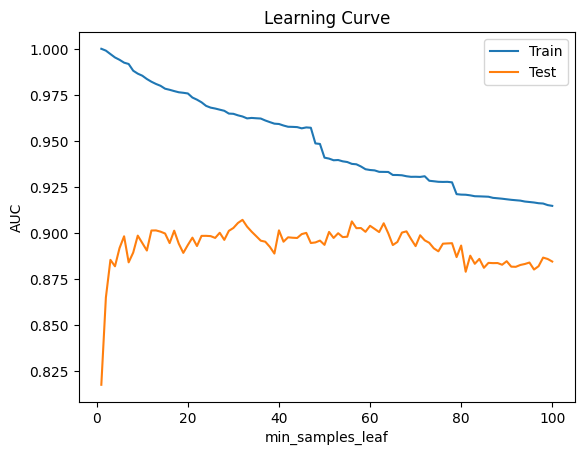

In [40]:
def draw_learning_curve(param_values):
    train_scores= []
    test_scores= []

    for i in param_values:
      dtc = DecisionTreeClassifier(min_samples_leaf = i)
      dtc.fit(X_train, y_train)

      # eval on train
      y_pred_train_proba = dtc.predict_proba(X_train)
      train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
      train_scores.append(train_auc)

      #eval on test
      y_pred_proba = dtc.predict_proba(X_test)
      test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
      test_scores.append(test_auc)

      print('param value: ' +str(i) + '; train: ' +str(train_auc) + '; test: ' + str(test_auc))


    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('min_samples_leaf')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values= [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve(param_values)


## Feature Importance

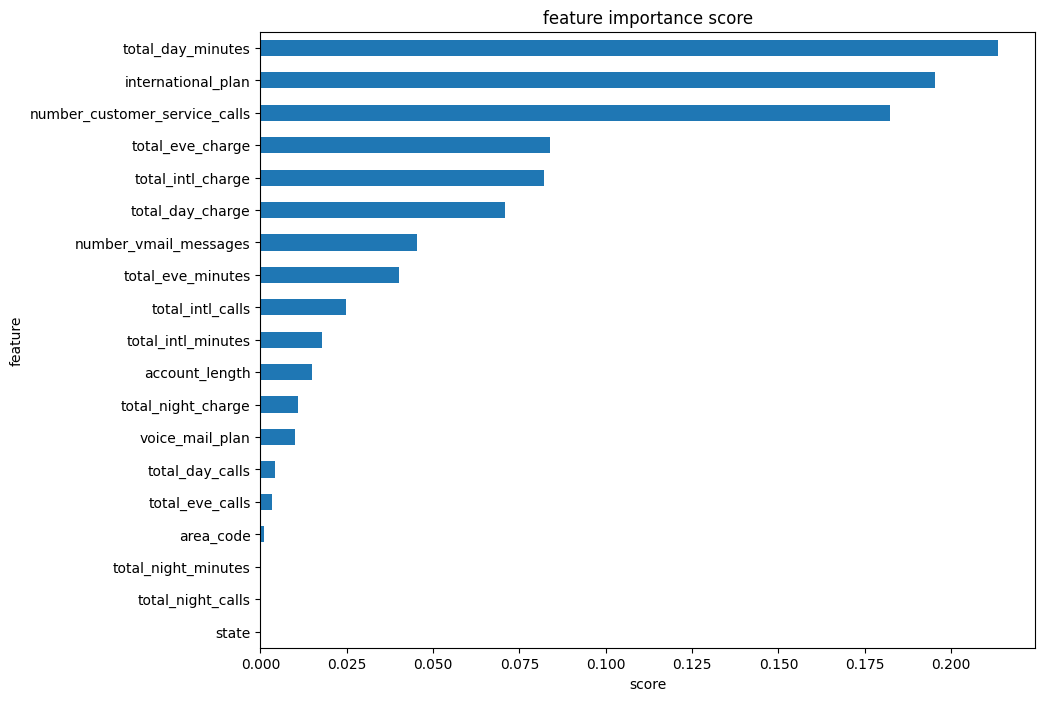

In [41]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind= 'barh', figsize=(10, 8))
    ax.invert_yaxis()


    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')
    
show_feature_importance(dtc)


In [42]:
from google.colab import files
uploaded = files.upload()

Saving Data Train Provider.csv to Data Train Provider (1).csv


In [43]:
import io
import pandas as pd
df= pd.read_csv(io.BytesIO(uploaded['Data Train Provider.csv']))

In [44]:
max_charge = df['total_day_charge'].max()
print("The highest value of total_day_charge is:", max_charge)

mean_total_day_charge = df['total_day_charge'].mean()
print("The highest value of total_day_charge is:", mean_total_day_charge)

The highest value of total_day_charge is: 59.76
The highest value of total_day_charge is: 30.644682352941174


In [45]:
night_calls = df['total_night_calls'].sum()
print("the total_night_calls total is:", night_calls)

the total_night_calls total is: 424318


From the histogram results below, the highest feature that has an effect on determining whether a customer can experience churn or not is total_day_charge.

Then in second place is the international_plan feature and in third place is the number_customer_service_calls feature

## Busines insight and rekomendasi

* Companies need to pay attention to the amount of fees charged to customers for using the service in one day. If the fees are too high, customers may become dissatisfied with the service and switch to another provider. Based on the data, the highest total_day_charge is 59.76 and the average total_day_charge is 30.64. Therefore, companies need to pay attention to pricing in order to remain competitive but not burdensome to customers.

* Customers with international activities may require more frequent international communications than regular customers. Based on the data, there are still many customers who do not have an international service package. Therefore, Companies need to ensure that they offer competitive international plans and provide good service to the customers who have them.

* Customers who frequently contact customer service are most likely to experience problems with service. This can be seen from total_night_calls, because the more calls that come in outside working hours, the more likely the service will experience problems. Based on the data held, the total_night_calls totaled 424318 calls. Therefore, companies need to ensure that their customer service is responsive and can help customers solve their problems quickly and effectively.